# Smart India Hachathon'2019
## Prolem Statement: Predictive analysis of pharmaceutical equipment
## Team name: Machhali eleven 360, Rank #2 in grand finale at Oriental University, Indore
### IIT Bhubaneswar
### Team member
* Basant Kumar
* Kumari Partibha
* Anand Prakash
* Pawan Saini
* Kumar Ankul
* Gourav Barnwal
### Mentor
* Dr. Adway Mitra
* Dr. Nilgiri Puhan

In [1]:
import pandas as pd
import numpy as np
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


Using TensorFlow backend.


# LSTM for prediction of dataset of next step using moving window

In [3]:
series = pd.read_csv('sine.csv', header=None )


In [4]:
series.head()


,0
0,0.873736
1,0.902554
2,0.927809
3,0.949402
4,0.967249


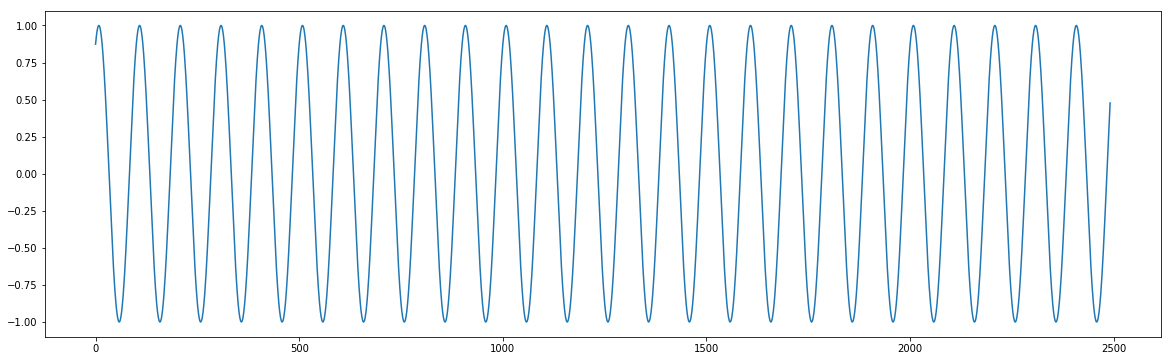

In [5]:
pyplot.figure(figsize=(20,6))
pyplot.plot(series.values)
pyplot.show()


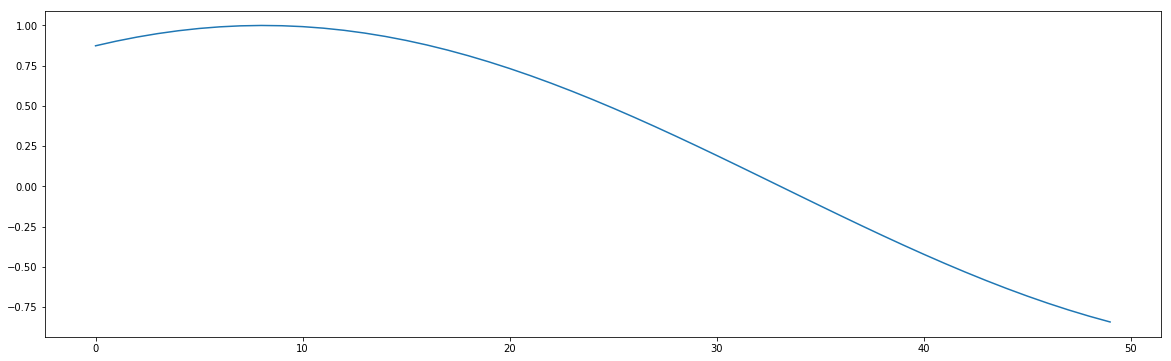

In [6]:
pyplot.figure(figsize=(20,6))
pyplot.plot(series.values[:50])
pyplot.show()


In [7]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(series.values)
series = pd.DataFrame(scaled)


In [8]:
series.head()

,0
0,0.873749
1,0.902566
2,0.927822
3,0.949416
4,0.967263


In [9]:
window_size = 50

series_s = series.copy()
for i in range(window_size):
    series = pd.concat([series, series_s.shift(-(i+1))], axis = 1)
    
series.dropna(axis=0, inplace=True)


In [10]:
series.head()


,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0.873749,0.902566,0.927822,0.949416,0.967263,0.981292,0.991449,0.997693,1.000000,0.998360,...,-0.477101,-0.531344,-0.583490,-0.633333,-0.680677,-0.725334,-0.767129,-0.805896,-0.841483,-0.873749
1,0.902566,0.927822,0.949416,0.967263,0.981292,0.991449,0.997693,1.000000,0.998360,0.992780,...,-0.531344,-0.583490,-0.633333,-0.680677,-0.725334,-0.767129,-0.805896,-0.841483,-0.873749,-0.902566
2,0.927822,0.949416,0.967263,0.981292,0.991449,0.997693,1.000000,0.998360,0.992780,0.983282,...,-0.583490,-0.633333,-0.680677,-0.725334,-0.767129,-0.805896,-0.841483,-0.873749,-0.902566,-0.927822
3,0.949416,0.967263,0.981292,0.991449,0.997693,1.000000,0.998360,0.992780,0.983282,0.969904,...,-0.633333,-0.680677,-0.725334,-0.767129,-0.805896,-0.841483,-0.873749,-0.902566,-0.927822,-0.949416
4,0.967263,0.981292,0.991449,0.997693,1.000000,0.998360,0.992780,0.983282,0.969904,0.952697,...,-0.680677,-0.725334,-0.767129,-0.805896,-0.841483,-0.873749,-0.902566,-0.927822,-0.949416,-0.967263


In [11]:
nrow = round(0.8*series.shape[0])


In [12]:
train = series.iloc[:nrow, :]
test = series.iloc[nrow:,:]


In [13]:
from sklearn.utils import shuffle
train = shuffle(train)


In [14]:
train_X = train.iloc[:,:-1]
train_y = train.iloc[:,-1]
test_X = test.iloc[:,:-1]
test_y = test.iloc[:,-1]


In [15]:
train_X = train_X.values
train_y = train_y.values
test_X = test_X.values
test_y = test_y.values


In [16]:
train_X.shape                                                                  
train_y.shape
test_X.shape
test_y.shape


(488,)

In [17]:
test_X.shape


(488, 50)

In [18]:
train_X = train_X.reshape(train_X.shape[0],train_X.shape[1],1)
test_X = test_X.reshape(test_X.shape[0],test_X.shape[1],1)


In [19]:
train_X.shape
train_y.shape
test_X.shape
test_y.shape


(488,)

In [49]:
test_X.shape


(488, 50, 1)

In [20]:
model = Sequential()
model.add(LSTM(input_shape = (50,1), output_dim= 50, return_sequences = True))
model.add(Dropout(0.5))
model.add(LSTM(256))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="adam")
model.summary()


C:\Users\Basant\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=50, input_shape=(50, 1), return_sequences=True)`
  from ipykernel import kernelapp as app


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               314368    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 325,025
Trainable params: 325,025
Non-trainable params: 0
_________________________________________________________________


In [21]:
start = time.time()
model.fit(train_X,train_y,batch_size=512,nb_epoch=3,validation_split=0.1)
print("> Compilation Time : ", time.time() - start)


C:\Users\Basant\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Train on 1758 samples, validate on 196 samples
Epoch 1/3
1758/1758 [==============================] - 29s 16ms/step - loss: 0.4125 - val_loss: 0.1944
Epoch 2/3
1758/1758 [==============================] - 2s 1ms/step - loss: 0.1603 - val_loss: 0.0797
Epoch 3/3
1758/1758 [==============================] - 2s 1ms/step - loss: 0.0683 - val_loss: 0.0446
> Compilation Time :  41.12900900840759


In [23]:
preds = model.predict(test_X)

preds = scaler.inverse_transform(preds)


In [31]:
test_y=test_y.reshape(-1, 1)
actuals = scaler.inverse_transform(test_y)

In [32]:
mean_squared_error(actuals,preds)


0.04326228676571276

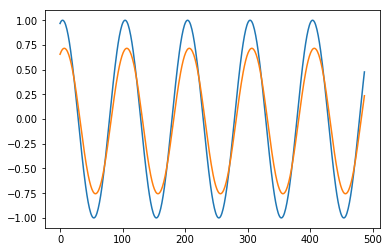

In [33]:
pyplot.plot(actuals)
pyplot.plot(preds)
pyplot.show()


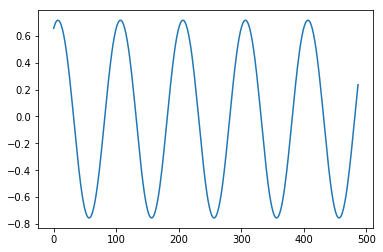

In [34]:
pyplot.plot(preds)
pyplot.show()


In [46]:
def moving_test_window_preds(n_future_preds):

    ''' n_future_preds - Represents the number of future predictions we want to make
                         This coincides with the number of windows that we will move forward
                         on the test data
    '''
    preds_moving = []                                    # Use this to store the prediction made on each test window
    moving_test_window = [test_X[0,:].tolist()]          # Creating the first test window
    moving_test_window = np.array(moving_test_window)    # Making it an numpy array
    
    for i in range(n_future_preds):
        preds_one_step = model.predict(moving_test_window) # Note that this is already a scaled prediction so no need to rescale this
        preds_moving.append(preds_one_step[0,0]) # get the value from the numpy 2D array and append to predictions
        preds_one_step = preds_one_step.reshape(1,1,1) # Reshaping the prediction to 3D array for concatenation with moving test window
        moving_test_window = np.concatenate((moving_test_window[:,1:,:], preds_one_step), axis=1) # This is the new moving test window, where the first element from the window has been removed and the prediction  has been appended to the end
        #moving_test_window = np.concatenate((moving_test_window[:,1:,:], preds_one_step), axis=1)
    preds_moving = scaler.inverse_transform(np.array(preds_moving))
    
    return preds_moving


In [47]:
preds_moving = moving_test_window_preds(500)

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.6558282   0.6583302   0.6464375   0.6228694   0.5905843   0.5523286
  0.5104296   0.46673852  0.42265567  0.37919542  0.33706373  0.2967313
  0.25849694  0.22253773  0.18894626  0.15775767  0.12896766  0.10254472
  0.07843774  0.05658075  0.0368962   0.01929696  0.00368791 -0.01003264
 -0.02197166 -0.03224016 -0.04095181 -0.04822171 -0.05416517 -0.05889649
 -0.062528   -0.06516902 -0.06692521 -0.06789779 -0.06818305 -0.06787196
 -0.06704982 -0.06579606 -0.06418415 -0.06228148 -0.06014949 -0.05784379
 -0.05541427 -0.05290542 -0.05035653 -0.047802   -0.04527158 -0.0427907
 -0.04038069 -0.03805907 -0.03583985 -0.03370193 -0.03168586 -0.02979651
 -0.02803647 -0.0264066  -0.02490629 -0.02353373 -0.0222861  -0.02115968
 -0.02015003 -0.01925209 -0.01846029 -0.01776872 -0.01717114 -0.01666118
 -0.01623239 -0.01587828 -0.01559246 -0.01536867 -0.01520083 -0.01508308
 -0.01500982 -0.01497574 -0.01497583 -0.01500539 -0.01506005 -0.01513577
 -0.01522883 -0.01533584 -0.01545371 -0.01557966 -0.01571123 -0.0158462
 -0.01598263 -0.01611884 -0.01625337 -0.016385   -0.01651267 -0.01663556
 -0.01675296 -0.01686436 -0.01696937 -0.01706772 -0.01715925 -0.01724389
 -0.01732168 -0.01739271 -0.01745712 -0.01751513 -0.01756698 -0.01761294
 -0.01765334 -0.01768849 -0.01771873 -0.0177444  -0.01776586 -0.01778343
 -0.01779748 -0.01780833 -0.01781629 -0.01782168 -0.0178248  -0.01782591
 -0.01782529 -0.01782318 -0.0178198  -0.01781537 -0.01781008 -0.0178041
 -0.0177976  -0.01779072 -0.01778358 -0.0177763  -0.01776898 -0.01776169
 -0.01775453 -0.01774754 -0.01774079 -0.0177343  -0.01772812 -0.01772228
 -0.01771678 -0.01771164 -0.01770687 -0.01770247 -0.01769843 -0.01769475
 -0.01769143 -0.01768845 -0.01768579 -0.01768343 -0.01768138 -0.01767959
 -0.01767807 -0.01767678 -0.01767571 -0.01767484 -0.01767415 -0.01767363
 -0.01767326 -0.01767302 -0.01767289 -0.01767287 -0.01767293 -0.01767307
 -0.01767328 -0.01767354 -0.01767383 -0.01767416 -0.01767452 -0.0176749
 -0.01767528 -0.01767567 -0.01767606 -0.01767645 -0.01767683 -0.01767721
 -0.01767756 -0.0176779  -0.01767823 -0.01767853 -0.01767882 -0.01767909
 -0.01767934 -0.01767957 -0.01767978 -0.01767997 -0.01768013 -0.01768029
 -0.01768043 -0.01768055 -0.01768065 -0.01768074 -0.01768082 -0.01768088
 -0.01768094 -0.01768098 -0.01768101 -0.01768104 -0.01768105 -0.01768107
 -0.01768107 -0.01768107 -0.01768107 -0.01768106 -0.01768104 -0.01768103
 -0.01768101 -0.01768099 -0.01768097 -0.01768095 -0.01768093 -0.01768091
 -0.01768089 -0.01768087 -0.01768085 -0.01768083 -0.01768081 -0.01768079
 -0.01768078 -0.01768076 -0.01768075 -0.01768073 -0.01768072 -0.01768071
 -0.0176807  -0.01768069 -0.01768068 -0.01768067 -0.01768067 -0.01768066
 -0.01768065 -0.01768065 -0.01768064 -0.01768064 -0.01768064 -0.01768064
 -0.01768063 -0.01768063 -0.01768063 -0.01768063 -0.01768063 -0.01768063
 -0.01768063 -0.01768063 -0.01768063 -0.01768063 -0.01768063 -0.01768063
 -0.01768063 -0.01768064 -0.01768064 -0.01768064 -0.01768064 -0.01768064
 -0.01768064 -0.01768064 -0.01768064 -0.01768064 -0.01768064 -0.01768064
 -0.01768065 -0.01768064 -0.01768065 -0.01768065 -0.01768065 -0.01768065
 -0.01768065 -0.01768065 -0.01768065 -0.01768065 -0.01768065 -0.01768065
 -0.01768065 -0.01768065 -0.01768065 -0.01768065 -0.01768065 -0.01768066
 -0.01768066 -0.01768065 -0.01768066 -0.01768065 -0.01768065 -0.01768066
 -0.01768065 -0.01768066 -0.01768065 -0.01768065 -0.01768065 -0.01768065
 -0.01768065 -0.01768065 -0.01768065 -0.01768066 -0.01768065 -0.01768065
 -0.01768065 -0.01768065 -0.01768066 -0.01768065 -0.01768065 -0.01768065
 -0.01768065 -0.01768065 -0.01768066 -0.01768065 -0.01768065 -0.01768065
 -0.01768065 -0.01768065 -0.01768066 -0.01768065 -0.01768065 -0.01768066
 -0.01768065 -0.01768065 -0.01768065 -0.01768066 -0.01768066 -0.01768066
 -0.01768065 -0.01768066 -0.01768066 -0.01768066 -0.01768066 -0.01768066
 -0.01768066 -0.01768065 -0.01768065 -0.01768066 -0.01768065 -0.01768066
 -0.01768065 -0.01768066 -0.01768066 -0.01768066 -0.01768066 -0.01768065
 -0.01768066 -0.01768066 -0.01768065 -0.01768066 -0.01768065 -0.01768066
 -0.01768066 -0.01768066 -0.01768065 -0.01768066 -0.01768066 -0.01768066
 -0.01768066 -0.01768065 -0.01768065 -0.01768066 -0.01768065 -0.01768065
 -0.01768065 -0.01768065 -0.01768065 -0.01768065 -0.01768065 -0.01768065
 -0.01768066 -0.01768065 -0.01768065 -0.01768065 -0.01768066 -0.01768065
 -0.01768065 -0.01768065 -0.01768065 -0.01768065 -0.01768065 -0.01768065
 -0.01768065 -0.01768066 -0.01768065 -0.01768066 -0.01768065 -0.01768065
 -0.01768065 -0.01768066 -0.01768065 -0.01768066 -0.01768065 -0.01768065
 -0.01768065 -0.01768066 -0.01768065 -0.01768065 -0.01768065 -0.01768066
 -0.01768065 -0.01768065 -0.01768065 -0.01768065 -0.01768065 -0.01768065
 -0.01768065 -0.01768065 -0.01768066 -0.01768065 -0.01768065 -0.01768065
 -0.01768065 -0.01768065 -0.01768065 -0.01768065 -0.01768066 -0.01768065
 -0.01768065 -0.01768065 -0.01768065 -0.01768066 -0.01768065 -0.01768065
 -0.01768065 -0.01768065 -0.01768065 -0.01768065 -0.01768065 -0.01768065
 -0.01768066 -0.01768065 -0.01768066 -0.01768066 -0.01768065 -0.01768065
 -0.01768066 -0.01768065 -0.01768065 -0.01768066 -0.01768065 -0.01768066
 -0.01768066 -0.01768065 -0.01768066 -0.01768065 -0.01768066 -0.01768066
 -0.01768066 -0.01768066 -0.01768065 -0.01768066 -0.01768066 -0.01768065
 -0.01768066 -0.01768066 -0.01768066 -0.01768065 -0.01768066 -0.01768065
 -0.01768066 -0.01768065 -0.01768066 -0.01768065 -0.01768066 -0.01768065
 -0.01768065 -0.01768066 -0.01768066 -0.01768066 -0.01768065 -0.01768065
 -0.01768065 -0.01768066 -0.01768065 -0.01768066 -0.01768066 -0.01768065
 -0.01768066 -0.01768065 -0.01768065 -0.01768066 -0.01768065 -0.01768065
 -0.01768065 -0.01768066 -0.01768065 -0.01768065 -0.01768065 -0.01768066
 -0.01768066 -0.01768065 -0.01768065 -0.01768065 -0.01768065 -0.01768066
 -0.01768066 -0.01768065 -0.01768065 -0.01768066 -0.01768066 -0.01768066
 -0.01768066 -0.01768065 -0.01768065 -0.01768065 -0.01768065 -0.01768066
 -0.01768065 -0.01768065 -0.01768066 -0.01768066 -0.01768065 -0.01768066
 -0.01768065 -0.01768065].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.